In [2]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
data.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [8]:
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
X = data.drop(columns = 'Outcome', axis=1)
y = data['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
scaler = StandardScaler()

In [12]:
standardized = scaler.fit_transform(X)

In [13]:
X = standardized

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

Support Vector Classification

In [15]:
model = svm.SVC(kernel = 'sigmoid')

In [16]:
model.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [17]:
predictions = model.predict(X_test)

In [18]:
error = accuracy_score(predictions,y_test)

In [19]:
print(error)

0.7662337662337663


Decision Tree Classifier

In [20]:
model2 = DecisionTreeClassifier(random_state=0)

In [21]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
pre2 = model2.predict(X_test)

In [23]:
error2 = accuracy_score(pre2,y_test)
print(error2)

0.7012987012987013


Random Forest Classifier

In [24]:
model3 = RandomForestClassifier(n_estimators=100,random_state=0)

In [25]:
model3.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [26]:
pre3 = model3.predict(X_test)

In [27]:
error3 = accuracy_score(pre3,y_test)
print(error3)

0.8116883116883117


Logistic Regression

In [28]:
model4 = LogisticRegression()

In [29]:
model4.fit(X_train,y_train)

LogisticRegression()

In [30]:
pre4 = model4.predict(X_test)

In [31]:
error4 = accuracy_score(pre4,y_test)
print(error4)

0.7792207792207793


[Text(0.5, 0, 'Models'), Text(0, 0.5, 'Accuracy')]

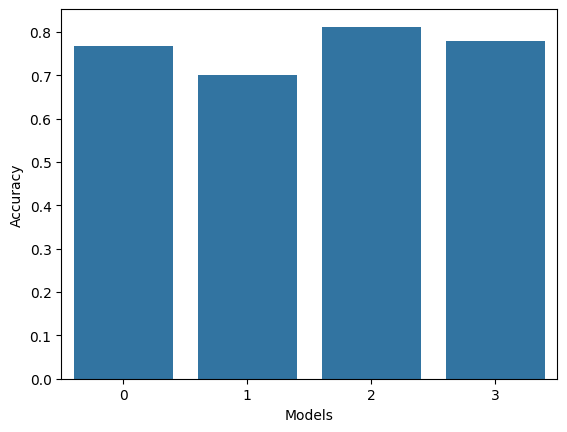

In [36]:
fig = sns.barplot(data=[error,error2,error3,error4], )
fig.set(xlabel='Models', ylabel='Accuracy')